Unsupervised Learning
======================

## objectives:

- Preprocessing input data
- Dimensionality reduction 
- Principal Component Analysis (PCA)
 - Dimensionality reduction
 - Data Compression
 - Visualization
- Clustering
 - K-Means
 - Other clustering methods

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

## Transformations

- Here, we will recale the data so that each feature is:
  - centered at zero (mean = 0)
  - with unit variance (standard deviation = 0).
  
 $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$
 



In [2]:
'''make it standard by deducting mean and devide them all by sd
   then in standard , mean becomes = 0 
                      std becomes = 1    '''

a = np.array([1, 2, 3, 4, 5])

a_standardized = (a - a.mean())/a.std()

print(a_standardized)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [3]:
print(a.mean())
print(a.std())

3.0
1.4142135623730951


In [4]:
print(a_standardized.mean())
print(a_standardized.std())

0.0
0.9999999999999999


 $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$
 
پس تا حالا دیدیم که اگر از فرمول  بریم 
میانگین و استاندارد دی وی رو  ۰ و ۱ کردیم  

## Using `sklearn` for transformations
### Loading Iris dataset

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data , iris.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state= 43)
print(x_train.shape)

(112, 4)


#### Mean and Standard Deviation of iris dataset

In [6]:
print(x_train.mean())
print(x_train.std())
# it should be 0 and 1

3.4984375
1.9651136521169983


#### Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
x_train_scaled = scaler.transform(x_train)
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std())

[-8.29197822e-16  1.11022302e-16  1.76446159e-16 -4.24263799e-16]
1.0


In [10]:
x_test_scaled = scaler.transform(x_test)
print(x_test_scaled.mean())
print(x_test_scaled.std())

-0.15076704209700476
1.0450882221513496


# Principal Component Analysis (PCA)

dimensionality reduction technique

#### Example use of PCA
It's easiest to visualize by looking at a two-dimensional dataset:

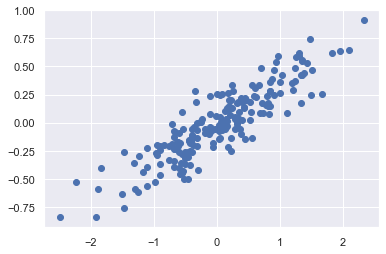

In [11]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('tight')
plt.show()

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [13]:
v1 = pca.components_[:, 0]
v2 = pca.components_[:, 1]
print(np.dot(v1, v2))

0.0


In [14]:
clf = PCA(.95)
x_trans = clf.fit_transform(X) #yani mige dar kudum jahat bechakhe va kudum boda hazf she va ba transform in karo kone
x_new = clf.inverse_transform(x_trans) # hala dobare becharkhune
print(X.shape)
print(x_trans.shape)

(200, 2)
(200, 1)


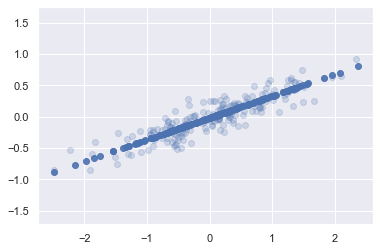

In [15]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=.2 )
plt.plot(x_new[:, 0], x_new[:,1], 'bo', alpha=.9)
plt.axis('equal');

### Application of PCA to Digits for Visualization

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
x, y = digits.data, digits.target
print(x.shape)

(1797, 64)


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_proj = pca.fit_transform(x)
print(x_proj.shape)

(1797, 2)


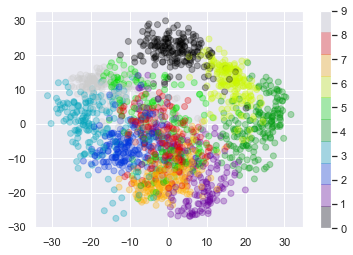

In [18]:
plt.scatter(x_proj[:,0], x_proj[:,1], c=y, alpha=.3,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar();

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
        Visualize the iris dataset using the first two principal components, and compare this visualization to using two of the original features.
      </li>
    </ul>
</div>

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler() #for compressing the data
pca = PCA(n_components=2) #for eliminating 2 features

iris = load_iris()
x, y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=43,
                                                   stratify=y)


In [34]:
sc.fit(x_train) #first get mean and std only from train dataset
sc_train_trans = sc.transform(x_train) #then affect on train and test dataset
sc_test_trans = sc.transform(x_test)

In [41]:
#tu pca, fit(yad gereftan jahat) faghat ru train
#vali ruye test dge fit nemikonim
#transform baraye tabdile data tebghe jahatei ke az fit gereftim ke ru 2ta datasete
pca_train = pca.fit(sc_train_trans) #train on train data

pca_train_trans = pca.transform(sc_train_trans) #transform on train and test
pca_test_trans = pca.transform(sc_test_trans)